In [1]:
# import required lib
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of binary classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.
</div>


In [2]:
medic_data = pd.read_csv('drug200.csv')
medic_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
medic_data.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [4]:
print([medic_data[key].value_counts() for key in medic_data.columns.to_list() if medic_data[key].dtype == 'object'])

[M    104
F     96
Name: Sex, dtype: int64, HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64, HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64, drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64]


In [5]:
# extract our feature and target as per the given task
X = medic_data.drop(['Drug'], axis=1)
Y = medic_data['Drug']

In [6]:
type(X)

pandas.core.frame.DataFrame

In [7]:
# as we can see X is still a DF, but it contains categorical data also
# have a loon into this
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [9]:
# to convert the categorical values into numbers, 
# we can use the label encoder method of sklearn
from sklearn.preprocessing import LabelEncoder

# instantiate Labelencoder
le = LabelEncoder()
for x in X.columns.to_list():
    if X[x].dtype == 'object':
        X[x] = le.fit_transform(X[x])

In [10]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [11]:
Y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

## splitting the train and test data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(140, 5) (140,)
(60, 5) (60,)


## Modelling

In [13]:
# instantiate the classifier
DT = DecisionTreeClassifier(criterion='entropy', max_depth=4)
DT  # default params

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
# fit the training set into the classifier
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Prediction and accuracy

In [15]:
y_pred = DT.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))
print(accuracy_score(DT.predict(X_train), y_train))

1.0
1.0


# Visualisation

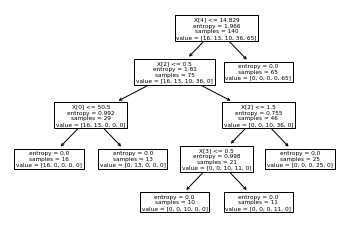

In [19]:
from sklearn import tree

tree.plot_tree(DT);

In [20]:
feature_names = X.columns.to_list()
target_names = Y.unique().tolist()

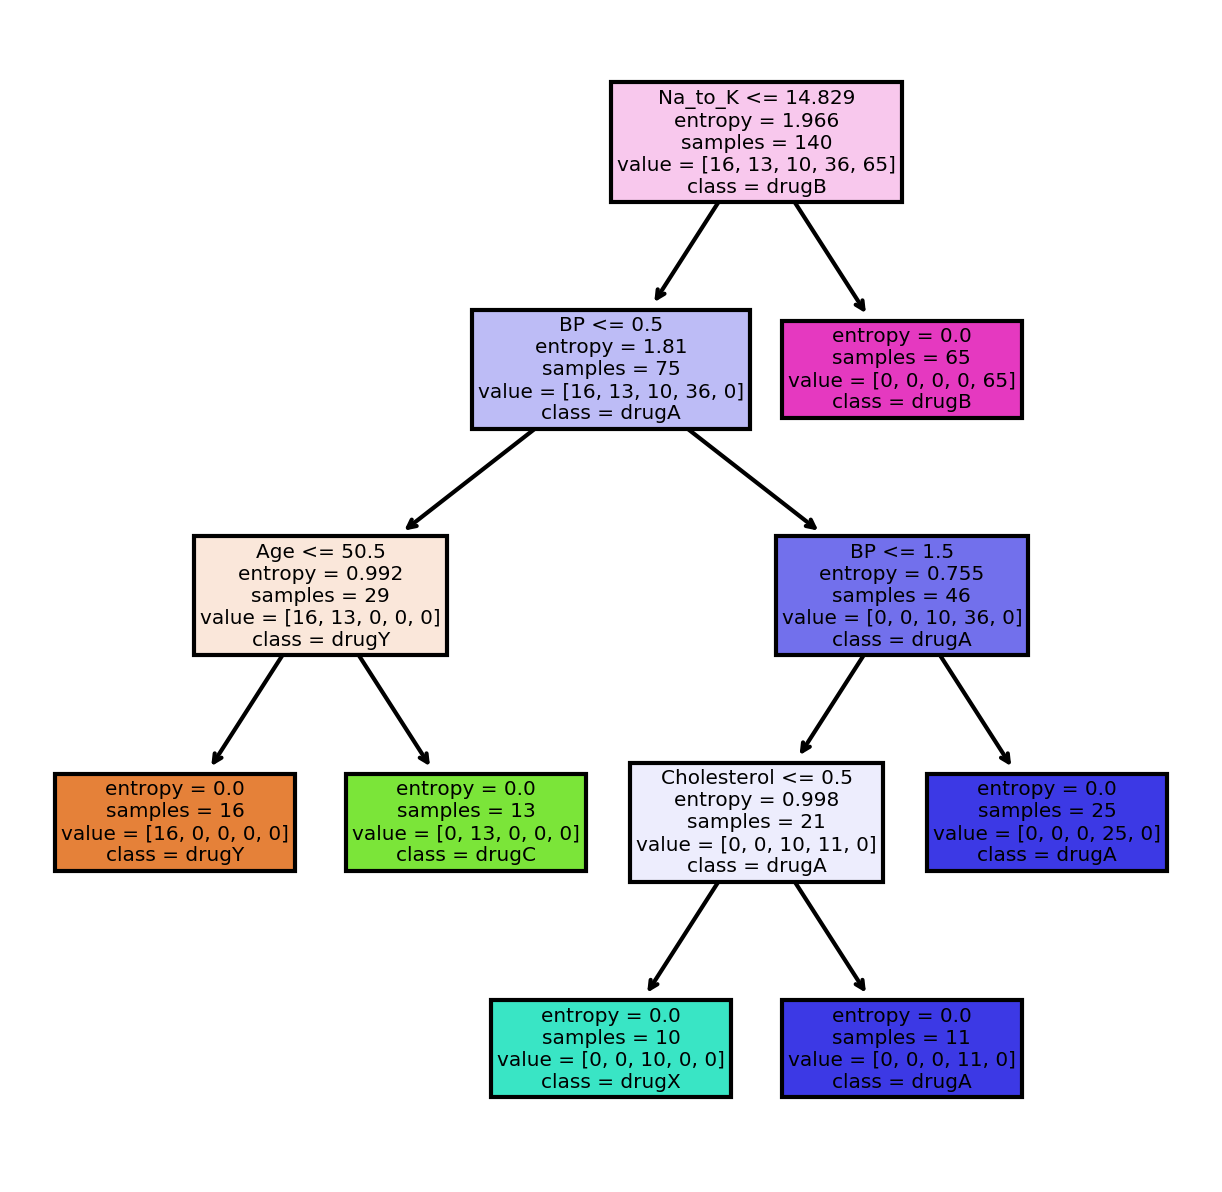

In [22]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), dpi=300)
tree.plot_tree(DT,
              feature_names=feature_names,
              class_names=target_names,
              filled = True)
plt.show()